# Learning From Data Homework #2

https://work.caltech.edu/homework/hw2.pdf

## 1
The answer is b, 0.01 is close to 0.03.

In [1]:
import numpy as np

v1s = []
vrands = []
vmins = []

In [4]:
for i in range(100000):
    matrix = np.random.randint(0,2,[1000,10])
    
    coin1 = matrix[0, :]
    coinrand = matrix[np.random.randint(0,1000), :]
    coinmin = matrix[np.argmin(np.sum(matrix, axis=1)), :]
    
    v1s.append(np.mean(coin1))
    vrands.append(np.mean(coinrand))
    vmins.append(np.mean(coinmin))

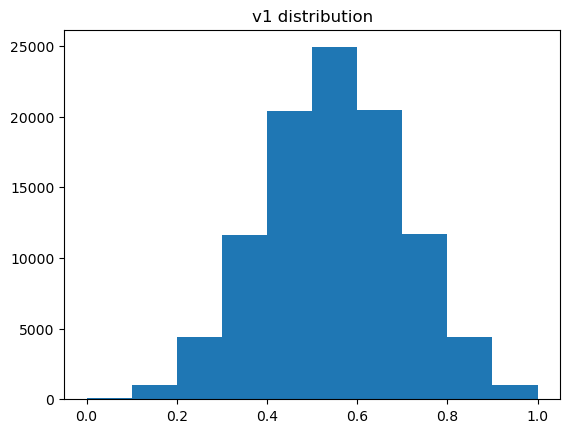

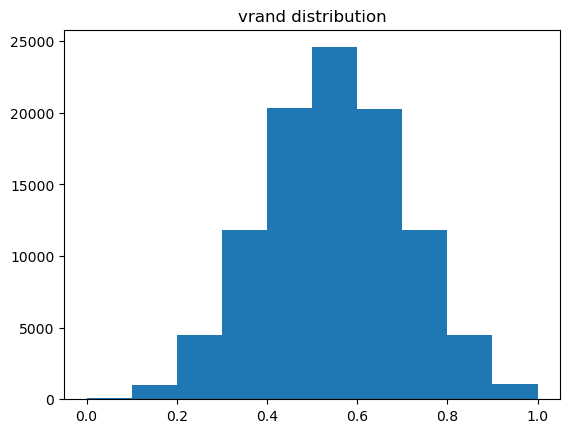

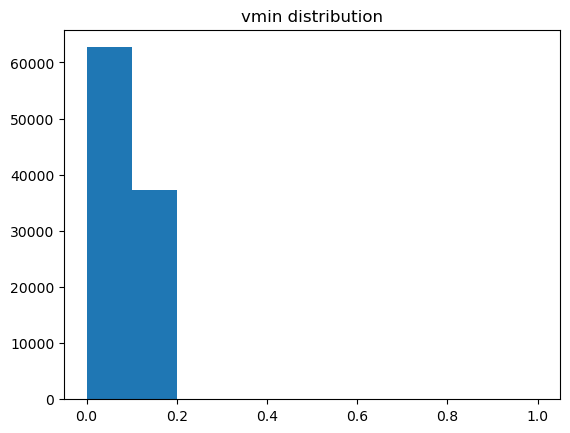

Mean of vmin is  0.037308


In [6]:
from matplotlib import pyplot as plt

plt.hist(v1s, bins=np.linspace(0, 10, 11)/10)
plt.title("v1 distribution")
plt.show()

plt.hist(vrands, bins=np.linspace(0, 10, 11)/10)
plt.title("vrand distribution")
plt.show()

plt.hist(vmins, bins=np.linspace(0, 10, 11)/10)
plt.title("vmin distribution")
plt.show()

print("Mean of vmin is ", np.mean(vmins))

## 2
The answer is vc1 and vcrand

## 3
The answer is e, since
$$ P(both \, right) + P(both\, wrong) = (1 - \mu)(1-\lambda) + \mu\lambda $$

## 4
The answer is 0.5, since 
$$ P(h(x)=y) = 1 - \mu - \lambda + 2\mu\lambda $$
when $ \lambda =0.5 $, $ \mu\ $ is disapperaed.

## 5 linear classification

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
d = 2

class Dataset:
    def __init__(self, N):
        self.X = 2*np.random.rand(N, d+1)-1  #-1 to 1
        self.X[:,0] = 1.0
        X = self.X
        xa = 2*np.random.rand() - 1
        ya = 2*np.random.rand() - 1
        xb = 2*np.random.rand() - 1
        yb = 2*np.random.rand() - 1
        xa, xb = min(xa, xb), max(xa, xb)
        self.xa = xa
        self.ya = ya
        self.xb = xb
        self.yb = yb
        self.a = (yb-ya)/(xb-xa)
        self.y = self.evaluate(X)
        
    def evaluate(self, X):
        return 2*(X[:,2] > self.ya + (X[:,1] - self.xa)*self.a)-1
    
    def plot(self, y=None):
        above = self.X[np.where(self.y < 0)]
        below = self.X[np.where(self.y >= 0)]
        plt.scatter(above[:,1], above[:,2], marker="x")
        plt.scatter(below[:,1], below[:,2], marker="o")
        if not y is None:
            wrong = np.where(y != self.y)
            plt.scatter(self.X[wrong,1], self.X[wrong,2], c="red")
        plt.plot([self.xa, self.xb], [self.ya, self.yb])
        plt.show()
        
def fit_ls(X, y):
    return np.linalg.solve(X.T@X, X.T@y)

def evaluate(X, w):
    return np.sign(X@w)

In [18]:
N = 100
#gs = np.zeros([1000, N])

total_Ein = 0.0
for i in range(1000):
    ds = Dataset(N)
    w_ls = fit_ls(ds.X, ds.y)
    total_Ein += np.sum(evaluate(ds.X, w_ls) != ds.y)/N

print(total_Ein/1000)

0.039010000000000024


***The answer is 0.01, c***

Then we rebulid the code

In [19]:
def generate_separable_data(N):
    X = 2*np.random.rand(N, 2+1)-1
    X[:,0] = 1.0
    xa = 2*np.random.rand() - 1
    ya = 2*np.random.rand() - 1
    xb = 2*np.random.rand() - 1
    yb = 2*np.random.rand() - 1
    xa, xb = min(xa, xb), max(xa, xb)
    xa = xa
    ya = ya
    xb = xb
    yb = yb
    a = (yb-ya)/(xb-xa)
    y = 2*(X[:,2] > ya + (X[:,1] - xa)*a)-1
    b = ya - xa*a
    return X, y, a, b

class LinearRegressionBinaryClassifier:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.w = np.linalg.solve(X.T@X, X.T@y)
        self.intercept = -self.w[0]/self.w[2]
        self.slope = -self.w[1]/self.w[2]
    
    def predict(self, X):
        return np.sign(X@self.w)

In [21]:
E_ins = []

for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(100)

    # Create a classifier based on least squares linear regression
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(X, y)

    # Find in-sample error
    yhat = ls_classifier.predict(X)
    E_in = np.mean(yhat != y)
    E_ins.append(E_in)
print("Mean in sample error for N=100 is", np.mean(E_ins))

Mean in sample error for N=100 is 0.03956000000000001


The result is near 0.04

## 6 Find the E out

In [22]:
E_ins = []
E_outs = []

for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(1000)
    Xsample, ysample = X[0:100,:], y[0:100]
    Xremaining, yremaining = X[100:,:], y[100:]

    # Create a classifier based on least squares linear regression
    # using only sample
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(Xsample, ysample)

    # Find out of sample error
    yhatout = ls_classifier.predict(Xremaining)
    E_out = np.mean(yhatout != yremaining)
    E_outs.append(E_out)
    
    # Find in sample error
    yhatin = ls_classifier.predict(Xsample)
    E_in = np.mean(yhatin != ysample)
    E_ins.append(E_in)
    
print("Mean out of sample error for N=100 is", np.mean(E_outs))
print("Mean in sample error for N=100 is", np.mean(E_ins))

Mean out of sample error for N=100 is 0.04922555555555556
Mean in sample error for N=100 is 0.039760000000000004


We can find that the answer is also near 0.01.

## 7 linear regression to PLA


In [25]:
class PerceptronBinaryClassifier:
    def __init__(self):
        self.w = np.zeros((X.shape[1],1))
    
    def fit(self, X, y, initial_weights=None):
        self.w = np.zeros((X.shape[1],1))
        if not initial_weights is None:
            self.w = initial_weights
        
        self.iter = 0
        while True:
            yhat = self.predict(X)
            misclassifieds = np.nonzero(y != yhat)[0]
            if len(misclassifieds) == 0:
                return
            i = np.random.choice(misclassifieds)
            self.w = self.w + y[i]*X[i,:]
            self.iter += 1
            if self.iter > 1000:
                print("Couldn't PLA")
                return

    def predict(self, X):
        return np.sign(X @ self.w)

In [26]:
iters = []
for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(10)

    # Create a classifier based on least squares linear regression
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(X, y)
    
    # Create a PLA classifier
    pla = PerceptronBinaryClassifier()
    pla.fit(X, y, initial_weights=ls_classifier.w)
    iters.append(pla.iter)
    
print("Mean iterations to converge when using LS estimated weights:", np.mean(iters))

Mean iterations to converge when using LS estimated weights: 3.762


/var/folders/x2/1f2pd_zs7w9bg4xgt__x3jxr0000gn/T/ipykernel_29248/3035889333.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  self.intercept = -self.w[0]/self.w[2]
/var/folders/x2/1f2pd_zs7w9bg4xgt__x3jxr0000gn/T/ipykernel_29248/3035889333.py:25: RuntimeWarning: invalid value encountered in double_scalars
  self.slope = -self.w[1]/self.w[2]


The result is near 1, (a)

## 8 Nonlinear Transformation

In [48]:
import random

def f(x):
    return np.sign(x[:, 1]**2 + x[:, 2]**2 - 0.6)

def generate_dataset(N):
    X = np.random.uniform(-1, 1, (N,3))
    X[:,0] = 1.0
    y = f(X)
    i_flip = list(np.arange(0, N))
    i_flip = random.sample(i_flip,10)
    y[i_flip] *= -1
    
    return X, y

In [49]:
E_ins = []
for i in range(1000):
    X, y = generate_dataset(100)
    lsr = LinearRegressionBinaryClassifier()
    lsr.fit(X, y)
    yhat = lsr.predict(X)
    E_ins.append(np.mean(y != yhat))
    
print("Mean error rate: ", np.mean(E_ins))

Mean error rate:  0.44376


The in-sample error is near 0.5

## 9 do translation

In [58]:
def transform(X):
    Z = np.zeros((X.shape[0], 6))
    Z[:,0] = 1.0
    Z[:,1] = X[:,1]
    Z[:,2] = X[:,2]
    Z[:,3] = X[:,1] * X[:,2]
    Z[:,4] = X[:,1]**2
    Z[:,5] = X[:,2]**2
    return Z

X, y = generate_dataset(1000)
Z = transform(X)
lsr = LinearRegressionBinaryClassifier()
lsr.fit(Z, y)
w_tilde = lsr.w

print(w_tilde)

[-1.24263409 -0.06521463  0.07658524  0.01193962  1.93056846  1.94915276]


So a is nearest

## 10

In [63]:
E_outs = []

for i in range(1000):
    X_all, y_all = generate_dataset(2000)

    X_train, y_train = X_all[:1000,:], y_all[0:1000]
    X_test, y_test = X_all[1000:,:], y_all[1000:]

    Z_train = transform(X_train)
    Z_test = transform(X_test)

    lsr = LinearRegressionBinaryClassifier()
    lsr.fit(Z_train, y_train)

    y_predicted = lsr.predict(Z_test)
    E_out = np.mean(y_test != y_predicted)
    E_outs.append(E_out)
    
print("Mean out of sample error is:", np.mean(E_outs))

Mean out of sample error is: 0.03458200000000001


The answer is near b, 0.1